## DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP 
## GRIP The Spark Foundation



## Task1:- Prediction Using Supervised ML (Level - Beginner)

## Author: Aditya Negi

## Simple Linear Regression

In this regression task we will aims to predict the percentage of marks a student is likely to score by considering only the number of hours they have studied. It is a straightforward linear regression task, which involving two variables.

In [1]:
# Importing the required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading the data from "study csv" file
sd = pd.read_csv("study.csv")

In [3]:
sd.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
sd.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [6]:
sd.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
sd.shape

(25, 2)

Let's create a 2D graph to visualize our dataset and identify any potential relationship between the data points.

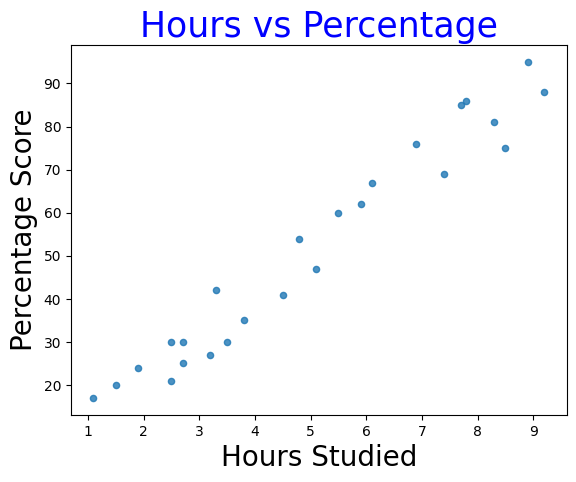

In [8]:
# Plotting the distribution of scores
sd.plot( kind = "scatter", x='Hours', y='Scores' , alpha = 0.8 )  
plt.title('Hours vs Percentage', size = '25' , color = 'blue')  
plt.xlabel('Hours Studied', size = '20')  
plt.ylabel('Percentage Score', size = '20')  
plt.show()


The plotted graph clearly indicates a positive linear relationship between the number of hours studied and the percentage of scores achieved.

# Preparing the data

The next step involves splitting the data into "attributes" (inputs) and "labels" (outputs).

In [9]:
X = sd.iloc[:, :-1].values 
y = sd.iloc[:, 1].values

After obtaining the attributes and labels, the next step is to split the data into training and test sets. We can achieve this by utilizing Scikit-Learn's train_test_split() method.

In [10]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

# Training the Algorithm

After successfully split our data into training and testing sets, it is now time to train our algorithm.

In [11]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


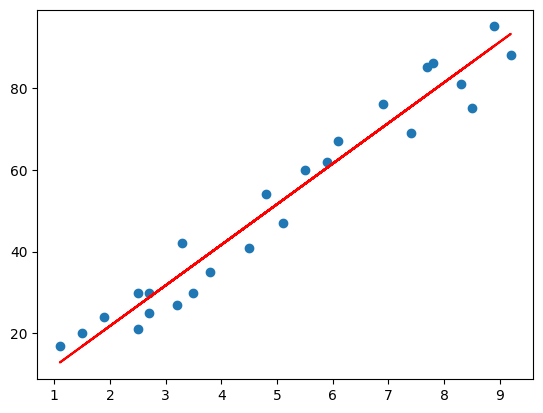

In [19]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line , color='red');
plt.show()

# Making Predictions

Now that we have trained our algorithm, it's time to make some predictions.

In [13]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [14]:
# In this we are comparing Actual vs Predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [15]:
# You can also test with your own data
hours = 9.25
test = np.array([hours])
test = test.reshape(-1,1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737535


# Evaluating the model

The final step involves evaluating the performance of the algorithm, which is crucial for comparing the effectiveness of different algorithms on a given dataset. In this case, we have chosen the mean square error as a metric to assess the performance.

In [16]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
